In [1]:
from bankingSystem import * 
from helperFunctions import *
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import warnings 
import multiprocessing
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2
%pylab inline 
pylab.rcParams['figure.figsize'] = (20, 10)
pylab.rcParams['font.size'] = 20

Populating the interactive namespace from numpy and matplotlib


In [8]:
import numpy as np
import pandas as pd
label = ["baseModel", "highReserve", "highLeverage","lowBorrow", "noBorrow","lowCorrelation", "noCorrelation","301", "302",]

defaultCollection = np.concatenate([np.load("defaultSimulation/defaultCollection_" + l + ".npy") for l in label],axis=0)
defaultBanks = np.concatenate([np.load("defaultSimulation/defaultBanks_" + l + ".npy") for l in label],axis=0)

In [9]:
pd.DataFrame(columns=label, data = defaultCollection.T).describe()

,baseModel,highReserve,highLeverage,lowBorrow,noBorrow,lowCorrelation,noCorrelation,301,302
count,2000.00000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0
mean,1.10300,0.541000,2.31300,0.355500,0.151000,1.085500,1.037500,0.003500,0.0
std,4.26374,3.077345,7.21582,1.998779,1.636013,1.965737,1.009259,0.116166,0.0
min,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
75%,0.00000,0.000000,1.00000,0.000000,0.000000,1.000000,2.000000,0.000000,0.0
max,62.00000,65.000000,85.00000,37.000000,53.000000,17.000000,7.000000,5.000000,0.0


Text(0.5, 0, 'Bank ID')

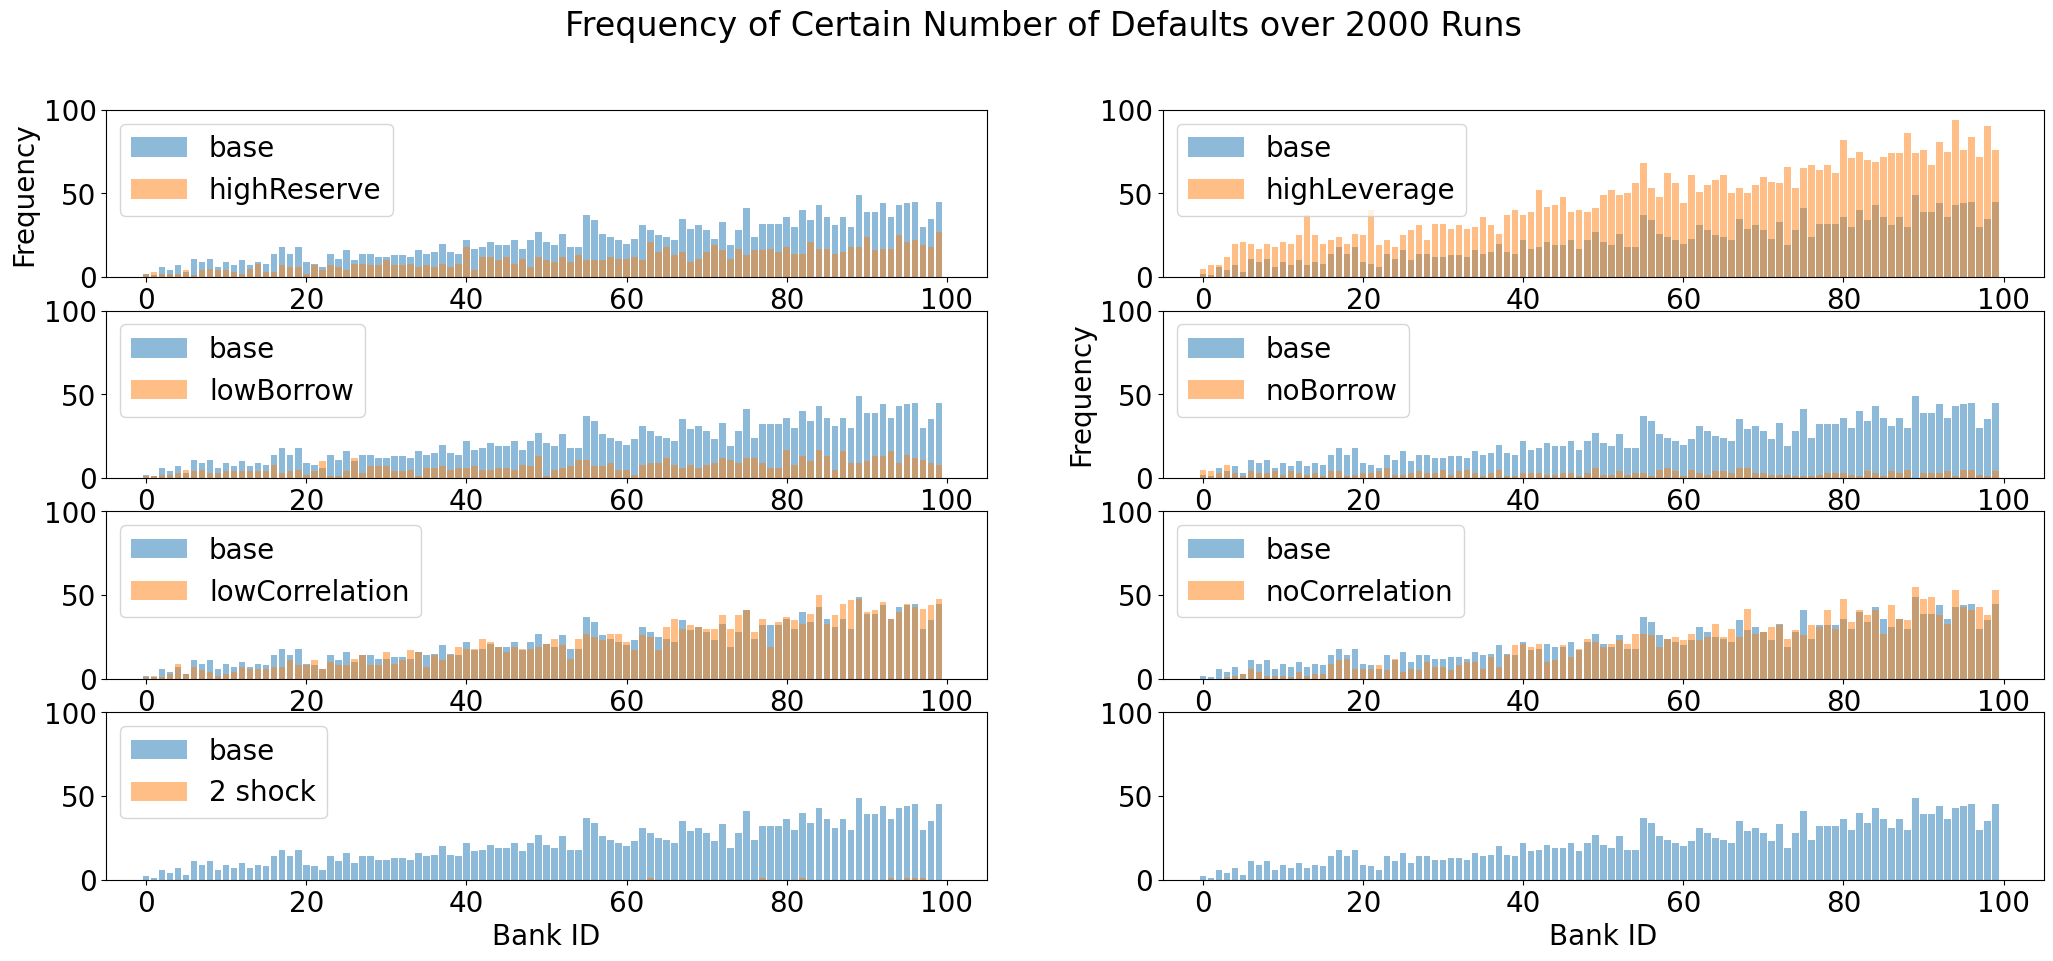

In [15]:
fig, axs = plt.subplots(4, 2, figsize=(25,10))
# Defining custom 'xlim' and 'ylim' values.
custom_xlim = (-5, 105)
custom_ylim = (0, 100)
# Setting the values for all axes.
plt.setp(axs, xlim=custom_xlim, ylim=custom_ylim)

fig.suptitle('Frequency of Certain Number of Defaults over 2000 Runs')
axs[0,0].bar(range(100), defaultBanks[0].sum(axis=0), label = "base",alpha=0.5)
axs[0,0].bar(range(100), defaultBanks[1].sum(axis=0), label = "highReserve",alpha=0.5)
axs[0,0].set_ylabel("Frequency")
axs[0,0].legend()
axs[0,1].bar(range(100), defaultBanks[0].sum(axis=0), label = "base",alpha=0.5)
axs[0,1].bar(range(100), defaultBanks[2].sum(axis=0), label = "highLeverage",alpha=0.5)
axs[0,1].legend()
axs[1,0].bar(range(100), defaultBanks[0].sum(axis=0), label = "base",alpha=0.5)
axs[1,0].bar(range(100), defaultBanks[3].sum(axis=0), label = "lowBorrow",alpha=0.5)
axs[1,0].legend()
axs[1,1].bar(range(100), defaultBanks[0].sum(axis=0), label = "base",alpha=0.5)
axs[1,1].bar(range(100), defaultBanks[4].sum(axis=0), label = "noBorrow",alpha=0.5)
axs[1,1].set_ylabel("Frequency")
axs[1,1].legend()
axs[2,0].bar(range(100), defaultBanks[0].sum(axis=0), label = "base",alpha=0.5)
axs[2,0].bar(range(100), defaultBanks[5].sum(axis=0), label = "lowCorrelation",alpha=0.5)
axs[2,0].legend()
axs[2,1].bar(range(100), defaultBanks[0].sum(axis=0), label = "base",alpha=0.5)
axs[2,1].bar(range(100), defaultBanks[6].sum(axis=0), label = "noCorrelation",alpha=0.5)
axs[2,1].legend()
axs[3,0].bar(range(100), defaultBanks[0].sum(axis=0), label = "base",alpha=0.5)
axs[3,0].bar(range(100), defaultBanks[7].sum(axis=0), label = "2 shock",alpha=0.5)
axs[3,0].set_xlabel("Bank ID")
axs[3,0].legend()
axs[3,1].bar(range(100), defaultBanks[0].sum(axis=0), label = "base",alpha=0.5)
axs[3,1].bar(range(100), defaultBanks[8].sum(axis=0), label = "3 shock",alpha=0.5)
axs[3,1].set_xlabel("Bank ID")

In [29]:
# portfolio return volatility
def R(cor,shockSize):
    returnVolatiliy = 0.18/np.sqrt(252)
    # return correlation matrix
    cMatrix = np.ones((100,100))*cor
    np.fill_diagonal(cMatrix, 1)
    Cholesky = np.linalg.cholesky(cMatrix * returnVolatiliy**2)
    r = np.abs(shockSize * Cholesky @ np.random.randn(100,1))
    return r

Rs = np.array([R(0.8,5).flatten() for _ in range(2000)])
Rs.shape


(2000, 100)

In [40]:
for cor in [0.9, 0.7,0]:
    Rs = np.array([R(cor,10).flatten() for _ in range(2000)])
    print(np.corrcoef(Rs.T).mean(), np.corrcoef(Rs.T).std(), Rs.mean(axis = 0).mean(), Rs.mean(axis=0).std())

0.7776288181834023 0.023623602216179842 0.09140003002355672 0.0007115000037903931
0.45043505635488573 0.058071694623004544 0.09045258437975441 0.0011147124150376862
0.0098595140182664 0.1019081449209786 0.09077307733893716 0.0016592952197357657
